In [3]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import OneClassSVM
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
import csv
from sklearn.neighbors import KNeighborsClassifier

In [4]:
data = pd.read_csv('player_team_data_final.csv')

data_model = data.drop(columns = ["match_date", 
                        "TeamA", "A_Player_Count", "A_Score", "A_Team_Pos", "A_team_shots_on", "A_team_shots_off", "A_team_corners",
                        "TeamB", "B_Player_Count", "B_Score", "B_Team_Pos", "B_team_shots_on", "B_team_shots_off", "B_team_corners"])
data_columns = data_model.columns
data_model.head()


,A_avg_overall,A_avgAge,A_total_value,A_Avg_crossing,A_Finishing,A_HeadAcc,A_Avg_Short_Passing,A_Avg_Volleys,A_Avg_Dribbling,A_Avg_Curve,...,B_avg_GKHandling,B_avg_GKPOsitioning,B_avg_GKReflexes,B_avg_DefensiveAwareness,B_roll_team_score,B_roll_team_pos,B_roll_team_shots_on,B_roll_team_shots_off,B_roll_team_corners,Team_A_Result
0,68.708333,26.291667,20.9,56.125000,47.541667,59.958333,61.041667,48.750000,58.208333,50.541667,...,16.625000,15.781250,18.000000,54.645161,0.666667,61.566667,4.000000,7.333333,5.666667,0
1,68.541667,26.291667,15.1,55.416667,50.708333,58.666667,60.958333,49.125000,59.750000,48.833333,...,22.740741,21.333333,21.888889,55.875000,3.666667,71.333333,7.666667,5.666667,9.333333,0
2,69.263158,25.157895,16.7,49.052632,46.105263,51.789474,55.736842,43.315789,54.105263,44.526316,...,17.115385,17.269231,16.461538,50.000000,0.666667,54.733333,4.666667,5.333333,6.333333,3
3,70.409091,26.000000,16.6,52.818182,48.000000,60.272727,61.227273,44.863636,57.545455,46.681818,...,19.250000,18.333333,19.958333,59.000000,1.666667,66.000000,6.333333,6.666667,7.000000,0
4,70.105263,27.736842,13.0,51.157895,45.631579,58.736842,59.894737,42.789474,55.473684,46.368421,...,19.074074,17.962963,18.370370,60.296296,3.666667,78.000000,9.666667,8.000000,6.666667,0


<h2>TRAINING/MODEL SELECTION</h2>

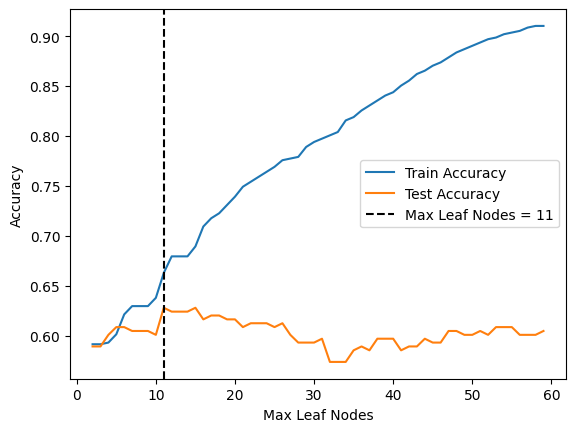

In [5]:
X = data_model.drop(columns = 'Team_A_Result')
y = data_model['Team_A_Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, shuffle = True)

###DecisionTree
d_tree_stats = []
for i in range(2, 60):
    clf_tree = tree.DecisionTreeClassifier(max_leaf_nodes = i, random_state = 42).fit(X_train, y_train)

    y_predict_train = clf_tree.predict(X_train)
    y_predict_test = clf_tree.predict(X_test)
    
    train_accuracy = accuracy_score(y_predict_train, y_train)
    test_accuracy = accuracy_score(y_predict_test, y_test)
    d_tree_stats.append([i, train_accuracy, test_accuracy])
    
d_tree_stats = np.array(d_tree_stats)

best_d_tree_depth = int(d_tree_stats[np.argmax(d_tree_stats[:,2]),0])
best_d_tree_error = 1 - d_tree_stats[best_d_tree_depth - 2, 2]
best_d_tree_train_error = 1 - d_tree_stats[best_d_tree_depth - 2, 1]

plt.plot(d_tree_stats[:,0], d_tree_stats[:,1], label = "Train Accuracy")
plt.plot(d_tree_stats[:,0], d_tree_stats[:,2], label = "Test Accuracy")
plt.xlabel("Max Leaf Nodes")
plt.ylabel("Accuracy")
plt.axvline(best_d_tree_depth, c = "black", ls = '--', label = "Max Leaf Nodes = {}".format(best_d_tree_depth))
plt.legend()
plt.show()

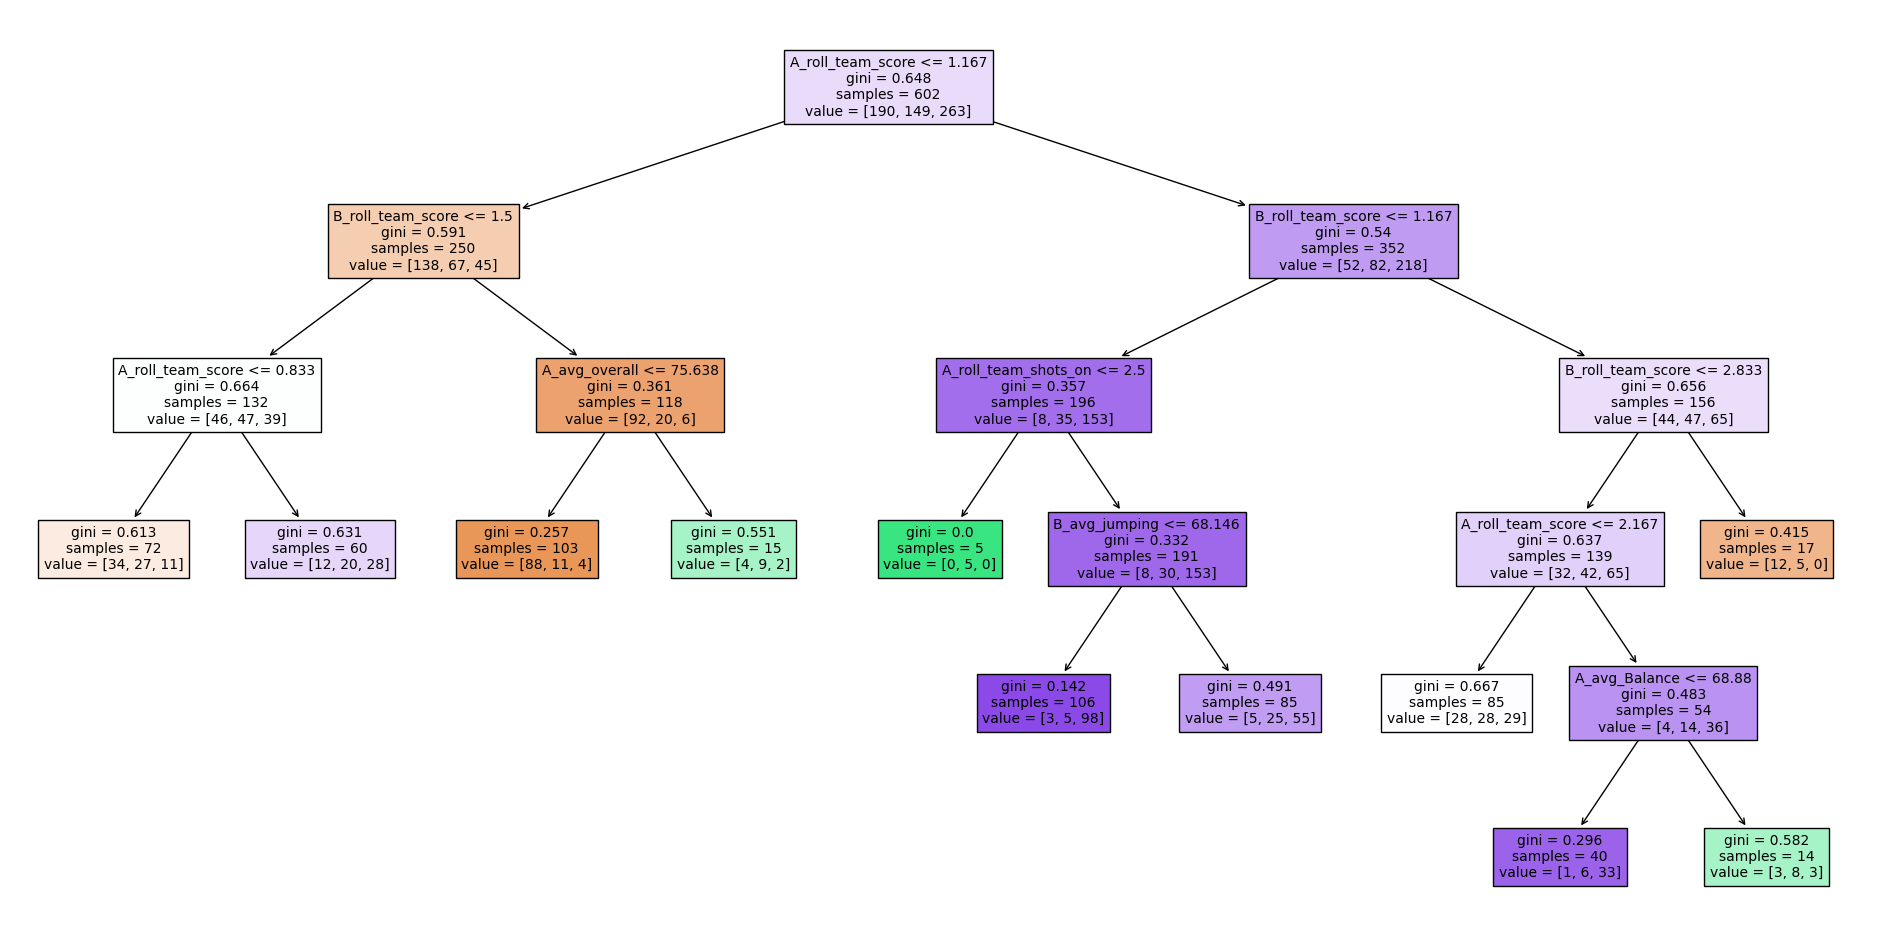

In [6]:
clf_tree = tree.DecisionTreeClassifier(max_leaf_nodes = best_d_tree_depth, random_state = 42).fit(X_train, y_train)

y_predict_train = clf_tree.predict(X_train)
y_predict_test = clf_tree.predict(X_test)

train_accuracy = accuracy_score(y_predict_train, y_train)
test_accuracy = accuracy_score(y_predict_test, y_test)

tree_test_error = 1 - test_accuracy
tree_train_error = 1 - train_accuracy

if True:
    plt.figure(figsize = (24,12))
    tree.plot_tree(clf_tree, filled = True, fontsize = 10, feature_names = data_columns[:-1])
    plt.show()

In [7]:
###RandomForest
knn_stats = []
for i in range(1, 100):
    if i % 10 == 0:
        print("KNN {} Neighbors".format(i))
    clf_forest = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    y_predict_train = clf_forest.predict(X_train)
    y_predict_test = clf_forest.predict(X_test)

    train_accuracy = accuracy_score(y_predict_train, y_train)
    test_accuracy = accuracy_score(y_predict_test, y_test)

    knn_test_error = 1 - test_accuracy
    knn_train_error = 1 - train_accuracy
    
    knn_stats.append([i, knn_test_error, knn_train_error])
    
knn_stats = np.array(knn_stats)

KNN 10 Neighbors
KNN 20 Neighbors
KNN 30 Neighbors
KNN 40 Neighbors
KNN 50 Neighbors
KNN 60 Neighbors
KNN 70 Neighbors
KNN 80 Neighbors
KNN 90 Neighbors


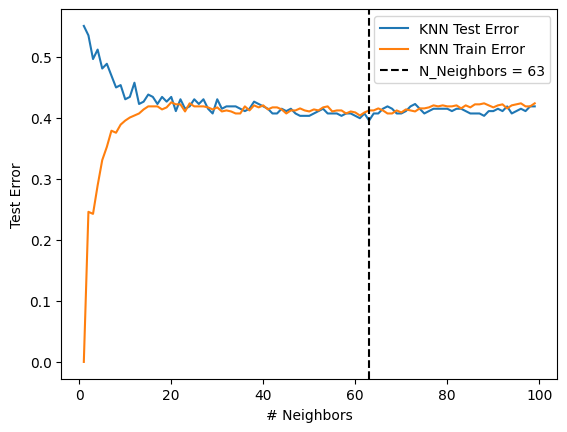

In [8]:
best_knn = int(knn_stats[np.argmin(knn_stats[:,1]),0])
best_knn_error = knn_stats[best_knn - 1,1]
best_knn_train_error = knn_stats[best_knn - 1, 2]

plt.plot(knn_stats[:,0], knn_stats[:,1], label = "KNN Test Error")
plt.plot(knn_stats[:,0], knn_stats[:,2], label = "KNN Train Error")
plt.xlabel("# Neighbors")
plt.ylabel("Test Error")
plt.axvline(x = best_knn, c = "black", ls = '--', label = "N_Neighbors = {}".format(best_knn))
plt.legend()
plt.show()

In [9]:
###RandomForest
stats_test = []
stats_train = []
for i in range(1, 150):
    if i % 20 == 0:
        print("RF {} Trees".format(i))
    clf_forest = RandomForestClassifier(n_estimators = i, random_state = 42).fit(X_train,y_train)
    y_predict_train = clf_forest.predict(X_train)
    y_predict_test = clf_forest.predict(X_test)

    train_accuracy = accuracy_score(y_predict_train, y_train)
    test_accuracy = accuracy_score(y_predict_test, y_test)

    forest_test_error = 1 - test_accuracy
    forest_train_error = 1 - train_accuracy
    
    stats_test.append([i, best_d_tree_error, best_knn_error, forest_test_error])
    stats_train.append([i, best_d_tree_train_error, best_knn_train_error, forest_train_error])
    
stats_test = pd.DataFrame(stats_test, columns = ["Trees", "CART Error", "KNN Error", "Random Forest Error"])
stats_train = pd.DataFrame(stats_train, columns = ["Trees", "CART Error", "KNN Error", "Random Forest Error"])

RF 20 Trees
RF 40 Trees
RF 60 Trees
RF 80 Trees
RF 100 Trees
RF 120 Trees
RF 140 Trees


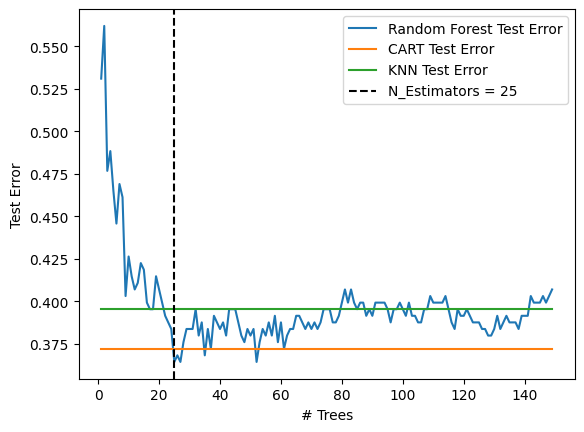

In [10]:
best_rf_estimators = np.argmin(stats_test["Random Forest Error"]) + 1

plt.plot(stats_test["Trees"], stats_test["Random Forest Error"], label = "Random Forest Test Error")
plt.plot(stats_test["Trees"], stats_test["CART Error"], label = "CART Test Error")
plt.plot(stats_test["Trees"], stats_test["KNN Error"], label = "KNN Test Error")
plt.xlabel("# Trees")
plt.ylabel("Test Error")
plt.axvline(x = best_rf_estimators, c = "black", ls = '--', label = "N_Estimators = {}".format(best_rf_estimators))
plt.legend()
plt.show()

In [11]:
###BoostedTree
gb_test = []
gb_train = []
for i in range(1, 150):
    if i % 10 == 0:
        print("GB {} Trees".format(i))
    clf_gb = GradientBoostingClassifier(n_estimators = i, random_state = 42).fit(X_train,y_train)
    y_predict_train = clf_gb.predict(X_train)
    y_predict_test = clf_gb.predict(X_test)

    train_accuracy = accuracy_score(y_predict_train, y_train)
    test_accuracy = accuracy_score(y_predict_test, y_test)

    gradient_test_error = 1 - test_accuracy
    gradient_train_error = 1 - train_accuracy
    
    gb_test.append(gradient_test_error)
    gb_train.append(gradient_train_error)

stats_test['GB Error'] = gb_test
stats_train['GB Error'] = gb_train


GB 10 Trees
GB 20 Trees
GB 30 Trees
GB 40 Trees
GB 50 Trees
GB 60 Trees
GB 70 Trees
GB 80 Trees
GB 90 Trees
GB 100 Trees
GB 110 Trees
GB 120 Trees
GB 130 Trees
GB 140 Trees


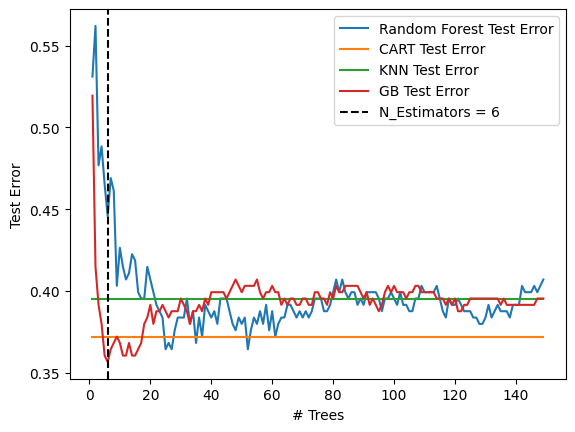

In [12]:
best_gb_estimators = np.argmin(stats_test["GB Error"]) + 1

plt.plot(stats_test["Trees"], stats_test["Random Forest Error"], label = "Random Forest Test Error")
plt.plot(stats_test["Trees"], stats_test["CART Error"], label = "CART Test Error")
plt.plot(stats_test["Trees"], stats_test["KNN Error"], label = "KNN Test Error")
plt.plot(stats_test["Trees"], stats_test["GB Error"], label = "GB Test Error")
plt.xlabel("# Trees")
plt.ylabel("Test Error")
plt.axvline(x = best_gb_estimators, c = "black", ls = '--', label = "N_Estimators = {}".format(best_gb_estimators))
plt.legend()
plt.show()

In [13]:
###AdaBoost
ab_test = []
ab_train = []
for i in range(1, 150):
    if i % 10 == 0:
        print("AB {} Trees".format(i))
    clf_ab = AdaBoostClassifier(n_estimators = i, random_state = 42).fit(X_train,y_train)
    y_predict_train = clf_ab.predict(X_train)
    y_predict_test = clf_ab.predict(X_test)

    train_accuracy = accuracy_score(y_predict_train, y_train)
    test_accuracy = accuracy_score(y_predict_test, y_test)

    adaboost_test_error = 1 - test_accuracy
    adaboost_train_error = 1 - train_accuracy
    
    ab_test.append(adaboost_test_error)
    ab_train.append(adaboost_train_error)
    
stats_test['AB Error'] = ab_test
stats_train['AB Error'] = ab_train

AB 10 Trees
AB 20 Trees
AB 30 Trees
AB 40 Trees
AB 50 Trees
AB 60 Trees
AB 70 Trees
AB 80 Trees
AB 90 Trees
AB 100 Trees
AB 110 Trees
AB 120 Trees
AB 130 Trees
AB 140 Trees


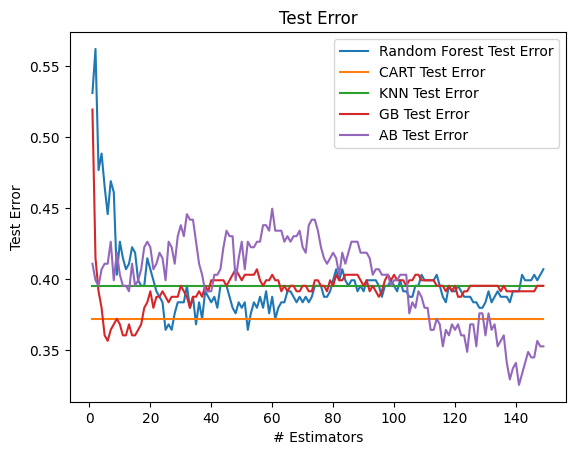

In [14]:
best_ab_estimators = np.argmin(stats_test["AB Error"]) + 1

plt.plot(stats_test["Trees"], stats_test["Random Forest Error"], label = "Random Forest Test Error")
plt.plot(stats_test["Trees"], stats_test["CART Error"], label = "CART Test Error")
plt.plot(stats_test["Trees"], stats_test["KNN Error"], label = "KNN Test Error")
plt.plot(stats_test["Trees"], stats_test["GB Error"], label = "GB Test Error")
plt.plot(stats_test["Trees"], stats_test["AB Error"], label = "AB Test Error")
plt.xlabel("# Estimators")
plt.ylabel("Test Error")
plt.title("Test Error")
#plt.axvline(x = best_ab_estimators, c = "black", ls = '--', label = "N_Estimators = {}".format(best_ab_estimators))
plt.legend()
plt.show()

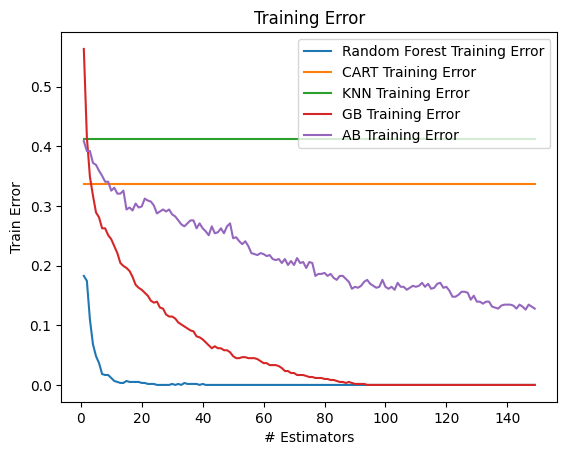

In [15]:
plt.plot(stats_train["Trees"], stats_train["Random Forest Error"], label = "Random Forest Training Error")
plt.plot(stats_train["Trees"], stats_train["CART Error"], label = "CART Training Error")
plt.plot(stats_train["Trees"], stats_train["KNN Error"], label = "KNN Training Error")
plt.plot(stats_train["Trees"], stats_train["GB Error"], label = "GB Training Error")
plt.plot(stats_train["Trees"], stats_train["AB Error"], label = "AB Training Error")
plt.xlabel("# Estimators")
plt.ylabel("Train Error")
plt.title("Training Error")
#plt.axvline(x = best_ab_estimators, c = "black", ls = '--', label = "N_Estimators = {}".format(best_ab_estimators))
plt.legend()
plt.show()

In [16]:
def plot_cm(model, X, y, X_train, y_train, X_test, y_test):
    model_name = str(type(model))[str(type(model)).rfind(".") + 1:len(str(type(model))) - 2]
    print("***{}***:".format(model_name))
    print("\n")
    print("******TRAINING RESULTS******")
    y_predict = model.predict(X_train)
    
    cm = confusion_matrix(y_predict, y_train)
    
    Win_True = np.flip(cm[:,2])
    Draw_True = np.flip(cm[:,1])
    Loss_True = np.flip(cm[:,0])
    
    idx = [["True Label", "True Label", "True Label"],
          ["Win", "Draw", "Loss"]]

    idx = pd.MultiIndex.from_tuples(list(zip(*idx)))

    col = [["Pred Label", "Pred Label", "Pred Label"],
           ["Win", "Draw", "Loss"]]

    col = pd.MultiIndex.from_tuples(list(zip(*col)))

    conf = pd.DataFrame((Win_True, Draw_True, Loss_True), 
                        columns = col,
                        index = idx)

    display(conf)
        
    train_accuracy = accuracy_score(y_predict, y_train)
    
    print("Train Accuracy:\t{}%".format(round(train_accuracy * 100, 2)))
    
    win_sens = Win_True[0] / (Win_True[0] + Win_True[1] + Win_True [2])
    draw_sens = Draw_True[1] / (Draw_True[0] + Draw_True[1] + Draw_True [2])
    loss_sens = Loss_True[2] / (Loss_True[0] + Loss_True[1] + Loss_True [2])

    print("Sensitivity: ")
    print("\t   Win: {}%".format(round(win_sens * 100, 2)))
    print("\t  Draw: {}%".format(round(draw_sens * 100, 2)))
    print("\t  Loss: {}%".format(round(loss_sens * 100, 2)))
    
    win_spec = (Draw_True[1] + Draw_True[2] + Loss_True[1] + Loss_True[2]) / (Draw_True[1] + Draw_True[2] + Loss_True[1] + Loss_True[2] + Draw_True[0] + Loss_True[0])
    draw_spec = (Win_True[0] + Win_True[2] + Loss_True[0] + Loss_True[2]) / (Win_True[0] + Win_True[2] + Loss_True[0] + Loss_True[2] + Win_True[1] + Loss_True[1])
    loss_spec = (Win_True[0] + Win_True[1] + Draw_True[0] + Draw_True[1]) / (Win_True[0] + Win_True[1] + Draw_True[0] + Draw_True[1] + Draw_True[2] + Win_True[2])

    print("Specificity: ")
    print("\t   Win: {}%".format(round(win_spec * 100, 2)))
    print("\t  Draw: {}%".format(round(draw_spec * 100, 2)))
    print("\t  Loss: {}%".format(round(loss_spec * 100, 2)))
    
    print("\n")
    print("******TESTING RESULTS******")
    y_predict = model.predict(X_test)
    
    cm = confusion_matrix(y_predict, y_test)
    
    Win_True = np.flip(cm[:,2])
    Draw_True = np.flip(cm[:,1])
    Loss_True = np.flip(cm[:,0])
    
    idx = [["True Label", "True Label", "True Label"],
          ["Win", "Draw", "Loss"]]

    idx = pd.MultiIndex.from_tuples(list(zip(*idx)))

    col = [["Pred Label", "Pred Label", "Pred Label"],
           ["Win", "Draw", "Loss"]]

    col = pd.MultiIndex.from_tuples(list(zip(*col)))

    conf = pd.DataFrame((Win_True, Draw_True, Loss_True), 
                        columns = col,
                        index = idx)

    display(conf)
        
    test_accuracy = accuracy_score(y_predict, y_test)
    
    print("Test Accuracy:\t{}%".format(round(test_accuracy * 100, 2)))
    
    win_sens = Win_True[0] / (Win_True[0] + Win_True[1] + Win_True [2])
    draw_sens = Draw_True[1] / (Draw_True[0] + Draw_True[1] + Draw_True [2])
    loss_sens = Loss_True[2] / (Loss_True[0] + Loss_True[1] + Loss_True [2])

    print("Sensitivity: ")
    print("\t   Win: {}%".format(round(win_sens * 100, 2)))
    print("\t  Draw: {}%".format(round(draw_sens * 100, 2)))
    print("\t  Loss: {}%".format(round(loss_sens * 100, 2)))
    
    win_spec = (Draw_True[1] + Draw_True[2] + Loss_True[1] + Loss_True[2]) / (Draw_True[1] + Draw_True[2] + Loss_True[1] + Loss_True[2] + Draw_True[0] + Loss_True[0])
    draw_spec = (Win_True[0] + Win_True[2] + Loss_True[0] + Loss_True[2]) / (Win_True[0] + Win_True[2] + Loss_True[0] + Loss_True[2] + Win_True[1] + Loss_True[1])
    loss_spec = (Win_True[0] + Win_True[1] + Draw_True[0] + Draw_True[1]) / (Win_True[0] + Win_True[1] + Draw_True[0] + Draw_True[1] + Draw_True[2] + Win_True[2])

    print("Specificity: ")
    print("\t   Win: {}%".format(round(win_spec * 100, 2)))
    print("\t  Draw: {}%".format(round(draw_spec * 100, 2)))
    print("\t  Loss: {}%".format(round(loss_spec * 100, 2)))


In [17]:
final_GB = GradientBoostingClassifier(n_estimators = best_gb_estimators, random_state = 42).fit(X_train,y_train)
plot_cm(final_GB, X, y, X_train, y_train, X_test, y_test)

***GradientBoostingClassifier***:


******TRAINING RESULTS******


Pred Label          
                       Win Draw Loss
True Label Win         253    0   10
           Draw         94   34   21
           Loss         43    1  146

Train Accuracy:	71.93%
Sensitivity: 
	   Win: 96.2%
	  Draw: 22.82%
	  Loss: 76.84%
Specificity: 
	   Win: 59.59%
	  Draw: 99.78%
	  Loss: 92.48%


******TESTING RESULTS******


Pred Label          
                       Win Draw Loss
True Label Win         112    4    8
           Draw         35    6   23
           Loss         16    6   48

Test Accuracy:	64.34%
Sensitivity: 
	   Win: 90.32%
	  Draw: 9.38%
	  Loss: 68.57%
Specificity: 
	   Win: 61.94%
	  Draw: 94.85%
	  Loss: 83.51%


In [18]:
final_RF = RandomForestClassifier(n_estimators = best_rf_estimators, random_state = 42).fit(X_train,y_train)
plot_cm(final_RF, X, y, X_train, y_train, X_test, y_test)

***RandomForestClassifier***:


******TRAINING RESULTS******


Pred Label          
                       Win Draw Loss
True Label Win         263    0    0
           Draw          0  149    0
           Loss          0    0  190

Train Accuracy:	100.0%
Sensitivity: 
	   Win: 100.0%
	  Draw: 100.0%
	  Loss: 100.0%
Specificity: 
	   Win: 100.0%
	  Draw: 100.0%
	  Loss: 100.0%


******TESTING RESULTS******


Pred Label          
                       Win Draw Loss
True Label Win          99   12   13
           Draw         28   15   21
           Loss         10   10   50

Test Accuracy:	63.57%
Sensitivity: 
	   Win: 79.84%
	  Draw: 23.44%
	  Loss: 71.43%
Specificity: 
	   Win: 71.64%
	  Draw: 88.66%
	  Loss: 81.91%


In [19]:
final_AB = AdaBoostClassifier(n_estimators = best_ab_estimators, random_state = 42).fit(X_train,y_train)
plot_cm(final_AB, X, y, X_train, y_train, X_test, y_test)

***AdaBoostClassifier***:


******TRAINING RESULTS******


Pred Label          
                       Win Draw Loss
True Label Win         242   20    1
           Draw         32  107   10
           Loss          1   17  172

Train Accuracy:	86.54%
Sensitivity: 
	   Win: 92.02%
	  Draw: 71.81%
	  Loss: 90.53%
Specificity: 
	   Win: 90.27%
	  Draw: 91.83%
	  Loss: 97.33%


******TESTING RESULTS******


Pred Label          
                       Win Draw Loss
True Label Win          98   21    5
           Draw         25   28   11
           Loss          6   16   48

Test Accuracy:	67.44%
Sensitivity: 
	   Win: 79.03%
	  Draw: 43.75%
	  Loss: 68.57%
Specificity: 
	   Win: 76.87%
	  Draw: 80.93%
	  Loss: 91.49%


In [20]:
final_KNN = KNeighborsClassifier(n_neighbors = int(best_knn)).fit(X_train,y_train)
plot_cm(final_KNN, X, y, X_train, y_train, X_test, y_test)

***KNeighborsClassifier***:


******TRAINING RESULTS******


Pred Label          
                       Win Draw Loss
True Label Win         213    1   49
           Draw         82    2   65
           Loss         48    3  139

Train Accuracy:	58.8%
Sensitivity: 
	   Win: 80.99%
	  Draw: 1.34%
	  Loss: 73.16%
Specificity: 
	   Win: 61.65%
	  Draw: 99.12%
	  Loss: 72.33%


******TESTING RESULTS******


Pred Label          
                       Win Draw Loss
True Label Win          98    0   26
           Draw         40    1   23
           Loss         13    0   57

Test Accuracy:	60.47%
Sensitivity: 
	   Win: 79.03%
	  Draw: 1.56%
	  Loss: 81.43%
Specificity: 
	   Win: 60.45%
	  Draw: 100.0%
	  Loss: 73.94%


In [21]:
final_CART = clf_tree
plot_cm(final_CART, X, y, X_train, y_train, X_test, y_test)

***DecisionTreeClassifier***:


******TRAINING RESULTS******


Pred Label          
                       Win Draw Loss
True Label Win         243    5   15
           Draw         84   22   43
           Loss         49    7  134

Train Accuracy:	66.28%
Sensitivity: 
	   Win: 92.4%
	  Draw: 14.77%
	  Loss: 70.53%
Specificity: 
	   Win: 60.77%
	  Draw: 97.35%
	  Loss: 85.92%


******TESTING RESULTS******


Pred Label          
                       Win Draw Loss
True Label Win         110    5    9
           Draw         36    5   23
           Loss         20    3   47

Test Accuracy:	62.79%
Sensitivity: 
	   Win: 88.71%
	  Draw: 7.81%
	  Loss: 67.14%
Specificity: 
	   Win: 58.21%
	  Draw: 95.88%
	  Loss: 82.98%


<h2>PREDICTION</h2>

In [22]:
features = []
for f, i in zip(final_AB.feature_names_in_, final_AB.feature_importances_):
    features.append([f, i])
    
features = np.array(features)
features = features[np.flip(np.argsort(features[:,1])),]
features[:10,:]

array([['B_roll_team_score', '0.06382978723404255'],
       ['A_roll_team_score', '0.05673758865248227'],
       ['A_Finishing', '0.0425531914893617'],
       ['A_avg_DefensiveAwareness', '0.0425531914893617'],
       ['B_avgAge', '0.03546099290780142'],
       ['B_roll_team_shots_off', '0.03546099290780142'],
       ['B_avg_Penalties', '0.03546099290780142'],
       ['A_avg_shotPower', '0.028368794326241134'],
       ['B_avg_reactions', '0.028368794326241134'],
       ['B_avg_strength', '0.028368794326241134']], dtype='<U32')

In [23]:
#####IMPORT PRED GROUP STAGE DATA

group_data = pd.read_csv('./pred_datasets/pred_data_match_GROUP.csv')
X_group = group_data.drop(columns = ["match_date", "match_comp", "comp_stage", "comp_group", 
                                    "TeamA", "A_player_count", 'A_avg_stamina',
                                    "TeamB", "B_player_count", 'B_avg_stamina'])
X_group = X_group.fillna(0)
#X_group.head(10)
print('Column Match: {}'.format(np.all(np.char.lower(list(X_group.columns)) == np.char.lower(list(X.columns)))))
group_pred = final_AB.predict(X_group)
group_prob = final_AB.predict_proba(X_group)

group_data["Team_A_Result"] = group_pred
group_data["Team_B_Result"] = np.where(group_data['Team_A_Result'] == 1, 1, 3 - group_pred)
group_data["Model_Prob"] = np.max(np.array(group_prob), axis=1)

#display(group_data[["comp_group", "TeamA", "TeamB", "Team_A_Result", "Team_B_Result", 'Model_Prob']])

#group_data[["comp_group", "TeamA", "TeamB", "Team_A_Result", "Team_B_Result", 'Model_Prob']].to_csv("group_pred.csv")

teamA = group_data[["comp_group", "TeamA", "Team_A_Result", "A_roll_team_score", "A_avg_overall"]] \
                        .rename(columns={"TeamA": "Team", "Team_A_Result": "Points", \
                                 "A_roll_team_score": "Roll_Score", "A_avg_overall": "Avg_Rating"})
teamB = group_data[["comp_group", "TeamB", "Team_B_Result", "B_roll_team_score", 'B_avg_overall']] \
                        .rename(columns={"TeamB": "Team", "Team_B_Result": "Points", \
                                 "B_roll_team_score": "Roll_Score", "B_avg_overall": "Avg_Rating"})
group_results = pd.concat((teamA, teamB))
group_results = group_results.groupby(by = ['comp_group', 'Team']) \
                                .agg({"Points":'sum', "Roll_Score":'mean', "Avg_Rating":'mean'}) \
                                .sort_values(by = ['comp_group', 'Points', "Roll_Score", 'Avg_Rating'], \
                                             ascending = [True, False, False, False])
display(group_results)

#group_results.to_csv("group_results.csv")

Column Match: True


Points  Roll_Score  Avg_Rating
comp_group Team                                          
A          Netherlands          7    2.000000   76.850000
           Ecuador              4    0.333333   70.043478
           Qatar                3    1.000000   69.000000
           Senegal              1    0.333333   72.684211
B          Wales                7    1.000000   70.320000
           England              4    1.000000   80.222222
           Iran                 4    1.000000   71.842105
           United States        1    0.000000   73.000000
C          Argentina            9    3.666667   79.545455
           Mexico               4    1.000000   75.480000
           Poland               4    0.333333   73.600000
           Saudi Arabia         0    0.000000   66.000000
D          Denmark              7    1.666667   76.277778
           Tunisia              4    2.000000   69.055556
           Australia            4    1.000000   69.916667
           France               1    0.666667   82.120000
E          Germany              5    2.666667   81.217391
           Costa Rica           3    1.666667   71.062500
           Spain                3    1.333333   75.846154
           Japan                2    0.666667   71.692308
F          Croatia              9    2.000000   76.285714
           Morocco              6    2.000000   75.384615
           Belgium              3    1.000000   78.833333
           Canada               0    0.666667   70.130435
G          Brazil               9    3.000000   78.774194
           Serbia               6    2.666667   76.333333
           Switzerland          3    1.666667   74.428571
           Cameroon             0    0.666667   74.857143
H          Uruguay              7    2.333333   76.565217
           Portugal             6    1.333333   78.760000
           Korea Republic       2    2.333333   71.000000
           Ghana                1    0.333333   74.714286

In [24]:
#####Construct Round of 16 data based on above

R16_data = pd.read_csv('./pred_datasets/pred_data_match_R16.csv')
X_R16 = R16_data.drop(columns = ["match_id", "match_date", "match_comp", "comp_stage", 
                                    "TeamA", "A_Player_Count", 
                                    "TeamB", "B_Player_Count"])
X_R16 = X_R16.fillna(0)
#display(X_R16.head(10))
print('Column Match: {}'.format(np.all(np.char.lower(list(X_R16.columns)) == np.char.lower(list(X.columns)))))
R16_pred = np.argmax(np.array(final_AB.predict_proba(X_R16))[:,[0,2]],axis=1) * 3
R16_prob = final_AB.predict_proba(X_R16)

R16_data["Team_A_Result"] = R16_pred
R16_data["Team_B_Result"] = np.where(R16_data['Team_A_Result'] == 1, 1, 3 - R16_pred)
R16_data["Model_Prob"] = np.max(np.array(R16_prob)[:,[0,2]], axis=1) + np.array(R16_prob)[:,1]

display(R16_data[["match_id", "TeamA", "TeamB", "Team_A_Result", "Team_B_Result", 'Model_Prob']])

#R16_data[["match_id", "TeamA", "TeamB", "Team_A_Result", "Team_B_Result", 'Model_Prob']].to_csv("r16_pred.csv")

Column Match: True


,match_id,TeamA,TeamB,Team_A_Result,Team_B_Result,Model_Prob
0,49,Netherlands,England,3,0,0.681975
1,50,Argentina,Tunisia,3,0,0.679657
2,51,Wales,Ecuador,3,0,0.677983
3,52,Denmark,Mexico,3,0,0.667992
4,54,Brazil,Portugal,3,0,0.676689
5,53,Germany,Morocco,3,0,0.677005
6,56,Uruguay,Serbia,0,3,0.669640
7,55,Croatia,Costa Rica,3,0,0.716183


In [25]:
#####Construct Quarterfinal data based on above

QF_data = pd.read_csv('./pred_datasets/pred_data_match_QF.csv')
X_QF = QF_data.drop(columns = ["match_id", "match_date", "match_comp", "comp_stage", 
                                    "TeamA", "A_Player_Count", 
                                    "TeamB", "B_Player_Count"])
X_QF = X_QF.fillna(0)
#display(X_QF.head(10))

print('Column Match: {}'.format(np.all(np.char.lower(list(X_QF.columns)) == np.char.lower(list(X.columns)))))
QF_pred = np.argmax(np.array(final_AB.predict_proba(X_QF))[:,[0,2]],axis=1) * 3
QF_prob = final_AB.predict_proba(X_QF)

QF_data["Team_A_Result"] = QF_pred
QF_data["Team_B_Result"] = np.where(QF_data['Team_A_Result'] == 1, 1, 3 - QF_pred)
QF_data["Model_Prob"] = np.max(np.array(QF_prob)[:,[0,2]], axis=1) + np.array(QF_prob)[:,1]

display(QF_data[["match_id", "TeamA", "TeamB", "Team_A_Result", "Team_B_Result", 'Model_Prob']])

#QF_data[["match_id", "TeamA", "TeamB", "Team_A_Result", "Team_B_Result", 'Model_Prob']].to_csv("QF_pred.csv")

Column Match: True


,match_id,TeamA,TeamB,Team_A_Result,Team_B_Result,Model_Prob
0,57,Netherlands,Argentina,0,3,0.717442
1,58,Germany,Brazil,0,3,0.708675
2,59,Wales,Denmark,0,3,0.668339
3,60,Croatia,Serbia,3,0,0.668562


In [26]:
#####Construct Semifinal data based on above

SF_data = pd.read_csv('./pred_datasets/pred_data_match_SF.csv')
X_SF = SF_data.drop(columns = ["match_id", "match_date", "match_comp", "comp_stage", 
                                    "TeamA", "A_Player_Count", 
                                    "TeamB", "B_Player_Count"])
X_SF = X_SF.fillna(0)
#display(X_SF.head(10))

print('Column Match: {}'.format(np.all(np.char.lower(list(X_SF.columns)) == np.char.lower(list(X.columns)))))
SF_pred = np.argmax(np.array(final_AB.predict_proba(X_SF))[:,[0,2]],axis=1) * 3
SF_prob = final_AB.predict_proba(X_SF)

SF_data["Team_A_Result"] = SF_pred
SF_data["Team_B_Result"] = np.where(SF_data['Team_A_Result'] == 1, 1, 3 - SF_pred)
SF_data["Model_Prob"] = np.max(np.array(SF_prob)[:,[0,2]], axis=1) + np.array(SF_prob)[:,1]

display(SF_data[["match_id", "TeamA", "TeamB", "Team_A_Result", "Team_B_Result", 'Model_Prob']])

#SF_data[["match_id", "TeamA", "TeamB", "Team_A_Result", "Team_B_Result", 'Model_Prob']].to_csv("SF_pred.csv")

Column Match: True


,match_id,TeamA,TeamB,Team_A_Result,Team_B_Result,Model_Prob
0,61,Argentina,Brazil,0,3,0.705323
1,62,Denmark,Croatia,3,0,0.667630


In [27]:
#####Construct Semifinal data based on above

final_data = pd.read_csv('./pred_datasets/pred_data_match_3rd_FINAL.csv')
X_final = final_data.drop(columns = ["match_id", "match_date", "match_comp", "comp_stage", 
                                    "TeamA", "A_Player_Count", 
                                    "TeamB", "B_Player_Count"])
X_final = X_final.fillna(0)
#display(X_final.head(10))

print('Column Match: {}'.format(np.all(np.char.lower(list(X_final.columns)) == np.char.lower(list(X.columns)))))
final_pred = np.argmax(np.array(final_AB.predict_proba(X_final))[:,[0,2]],axis=1) * 3
final_prob = final_AB.predict_proba(X_final)

final_data["Team_A_Result"] = final_pred
final_data["Team_B_Result"] = np.where(final_data['Team_A_Result'] == 1, 1, 3 - final_pred)
final_data["Model_Prob"] = np.max(np.array(final_prob)[:,[0,2]], axis=1) + np.array(final_prob)[:,1]

display(final_data[["match_id", "TeamA", "TeamB", "Team_A_Result", "Team_B_Result", 'Model_Prob']])

#final_data[["match_id", "TeamA", "TeamB", "Team_A_Result", "Team_B_Result", 'Model_Prob']].to_csv("final_pred.csv")

Column Match: True


,match_id,TeamA,TeamB,Team_A_Result,Team_B_Result,Model_Prob
0,63,Argentina,Croatia,3,0,0.679369
1,64,Brazil,Denmark,3,0,0.675762
